https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

From the previous section, we learned how we can easily characterize a wave with period/frequency, amplitude, phase. But these are easy for simple periodic signal, such as sine or cosine waves. For complicated waves, it is not easy to characterize like that. For example, the following is a relatively more complicate waves, and it is hard to say what’s the frequency, amplitude of the wave, right?

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.02.01-waves_with_3sine.jpg">

There are more complicated cases in real world, it would be great if we have a method that we can use to analyze the characteristics of the wave. The Fourier Transform can be used for this purpose, which it decompose any signal into a sum of simple sine and cosine waves that we can easily measure the frequency, amplitude and phase. The Fourier transform can be applied to continuous or discrete waves, in this chapter, we will only talk about the Discrete Fourier Transform (DFT).

Using the DFT, we can compose the above signal to a series of sinusoids and each of them will have a different frequency. The following 3D figure shows the idea behind the DFT, that the above signal is actually the results of the sum of 3 different sine waves. The time domain signal, which is the above signal we saw can be transformed into a figure in the frequency domain called DFT amplitude spectrum, where the signal frequencies are showing as vertical bars. The height of the bar after normalization is the amplitude of the signal in the time domain. You can see that the 3 vertical bars are corresponding the 3 frequencies of the sine wave, which are also plotted in the figure.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.02.02-time_frequency.png">

In this section, we will learn how to use DFT to compute and plot the DFT amplitude spectrum.

# DFT

The DFT can transform a sequence of evenly spaced signal to the information about the frequency of all the sine waves that needed to sum to the time domain signal. It is defined as:

$$ X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]} $$

where

- N = number of samples
- n = current sample
- k = current frequency, where 𝑘∈[0,𝑁−1]
- $𝑥_𝑛$ = the sine value at sample n
- $𝑋_{𝑘}$ = The DFT which include information of both amplitude and phase

Also, the last expression in the above equation derived from the Euler’s formula, which links the trigonometric functions to the complex exponential function: $e^{i\cdot x} = cosx+i\cdot sinx$

Due to the nature of the transform, $X_0 = \sum_{n=0}^{N-1}x_n$.

If $N$ is an odd number, the elements $X_1, X_2, ..., X_{(N-1)/2}$ contain the positive frequency terms and the elements $X_{(N+1)/2}, ..., X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency.
While if $N$ is even, the elements $X_1, X_2, ..., X_{N/2-1}$ contain the positive frequency terms, and the elements $X_{N/2},...,X_{N-1}$ contain the negative frequency terms, in order of decreasingly negative frequency. In the case that our input signal 𝑥 is a real-valued sequence, the DFT output 𝑋𝑛 for positive frequencies is the conjugate of the values 𝑋𝑛 for negative frequencies, the spectrum will be symmetric. Therefore, usually we only plot the DFT corresponding to the positive frequencies.

Note that the $X_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi kn/N}$ of function $x_n$.
The amplitude and phase of the signal can be calculated as:
$$amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$
$$phase = atan2(Im(X_k), Re(X_k))$$

where $Im(X_k)$ and $Re(X_k)$ are the imagery and real part of the complex number, 𝑎𝑡𝑎𝑛2 is the two-argument form of the 𝑎𝑟𝑐𝑡𝑎𝑛 function.

The amplitudes returned by DFT equal to the amplitudes of the signals fed into the DFT if we normalize it by the number of sample points. Note that doing this will divide the power between the positive and negative sides, if the input signal is real-valued sequence as we described above, the spectrum of the positive and negative frequencies will be symmetric, therefore, we will only look at one side of the DFT result, and instead of divide 𝑁, we divide 𝑁/2 to get the amplitude corresponding to the time domain signal.

Now that we have the basic knowledge of DFT, let’s see how we can use it.

TRY IT! Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

/tmp/ipykernel_17423/3986292583.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


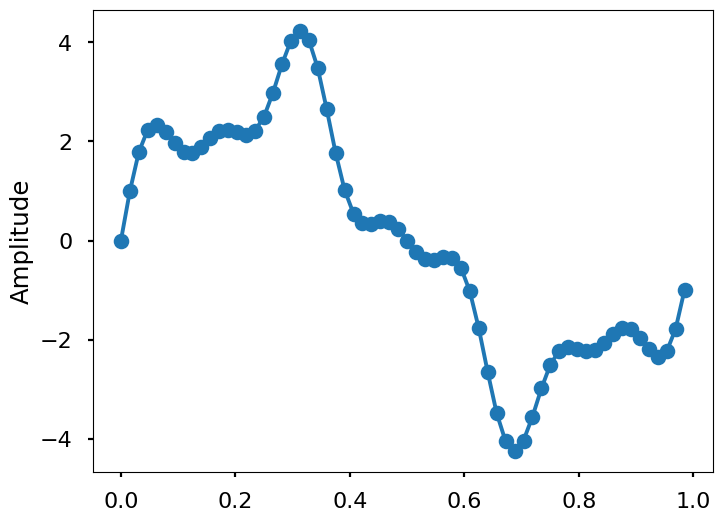

In [46]:
# sampling rate
sr = 2**6
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8, 6))
plt.plot(t, x, '-o')
plt.ylabel('Amplitude')

plt.show()

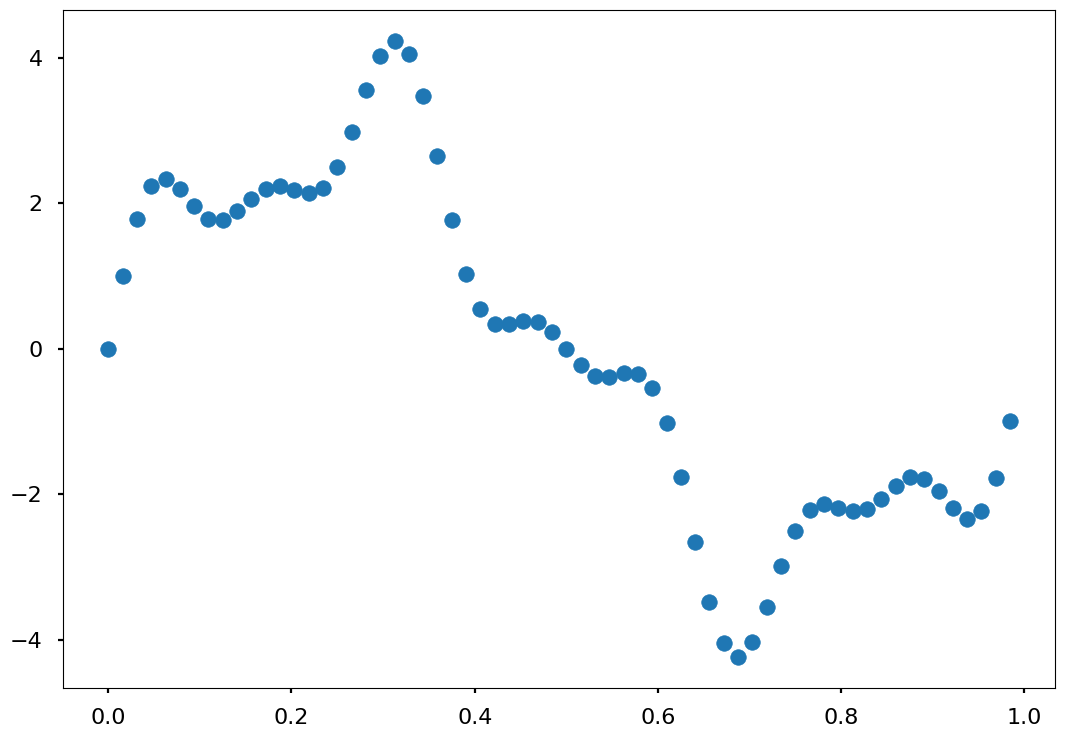

In [3]:
plt.scatter(t,x)

TRY IT! Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result.

In [49]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    e = np.exp(-2j * np.pi * k * n / N)
    #print(e)
    X = np.dot(e, x)

    return X

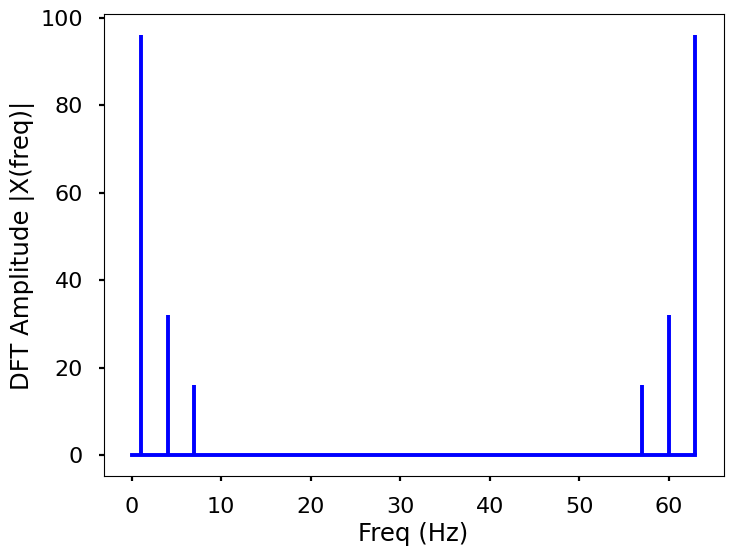

In [32]:
X = DFT(x)
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize=(8, 6))
plt.stem(freq, abs(X), 'b',
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

# The inverse DFT¶

Of course, we can do the inverse transform of the DFT easily.

$$x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$$

We will leave this as an exercise for you to write a function.

## Problem

Using the data "dubuque_temperature.csv",

- Construct pandas data form from "dubuque_temperature.csv"
- Find the DFT of the pandas data and plot absolute value of DTF
- Construct the inverse of DFT code by using the above definition.
- Using only partial data from the pandas data(for example, construct the even data points from the pandas data), find the invese of IDF and plot the whole pandas data and approximated data.

In the below, choose every three values of date and find approximate using the DFT(I save it as'test_image.png'). Plot the comparisons.

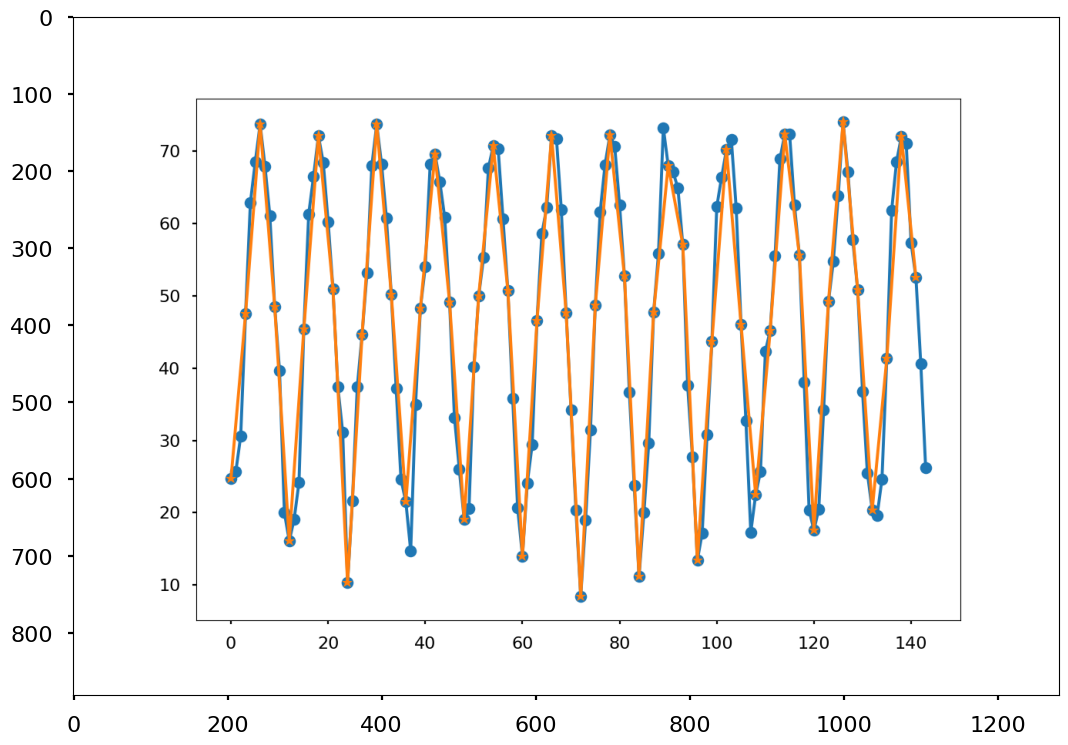

In [4]:
image3 = plt.imread('test_image2.png')
plt.imshow(image3)